# DAND Project 2: Investigating Gun Ownership in USA

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> With recent headlines again reporting on gun violence in America, I wanted to explore the data further. <br> 

> In this project I investigate gun permit and census data that includes information such as population, race, education, <br>
> economic factors and population density.




In [3]:
# Importing packages and data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('gun_data.csv')
dfpop = pd.read_csv('u.s.-census-data.csv')



<a id='wrangling'></a>
## Data Wrangling

> I started the process just seeing what was in these datasets. 

In [4]:
# Initial exploration of gun data.
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [5]:
# Checking the date range by looking at the tail end of the data.
df.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


In [6]:
# How many columns? 
df.shape

(12485, 27)

In [7]:
# What columns will be of interest? 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [8]:
# Now checking for null values - quite a lot. 
df.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [9]:
# Since there is a lot of null data, for clearer insights will focus on columns with the most data. 

In [10]:
# Initial exploration of census data.
dfpop.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [11]:
dfpop.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# It seems like there are ending rows with notes that aren't really part of the dataset. 
dfpop.shape

(85, 52)

In [13]:
dfpop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [14]:
dfpop.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [15]:
# Based on 20 null rows for most columns, looking at the ending 21 rows and seeing the footnotes to data. 
dfpop.tail(21)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
64,FIPS Code,NaN,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NOTE: FIPS Code values are enclosed in quotes ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Value Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1,Includes data not distributed by county.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Fact Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,(a),Includes persons reporting only one race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,(b),"Hispanics may be of any race, so also are incl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning 

In [16]:
# Now let's select the columns with the important information to use for analysis. Many of the columns have too many missing values to be included.
# In the gun data, important columns are state, handgun, long_gun, total, and date, so I'll drop the others.
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [17]:
df.drop(['permit', 'permit_recheck', 'other', 'multiple', 'admin', 
'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 
'redemption_other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun', 
'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 
'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other'], axis=1, inplace=True)

In [18]:
df.head()

,month,state,handgun,long_gun,totals
0,2017-09,Alabama,5734.0,6320.0,32019
1,2017-09,Alaska,2320.0,2930.0,6303
2,2017-09,Arizona,11063.0,7946.0,28394
3,2017-09,Arkansas,4347.0,6063.0,17747
4,2017-09,California,37165.0,24581.0,123506


In [19]:
# Cleaning the gun data.
# First, convert the string to a datetime column.
df['date'] = pd.to_datetime(df.month, format= "%Y-%m")


In [20]:
df.head()

,month,state,handgun,long_gun,totals,date
0,2017-09,Alabama,5734.0,6320.0,32019,2017-09-01
1,2017-09,Alaska,2320.0,2930.0,6303,2017-09-01
2,2017-09,Arizona,11063.0,7946.0,28394,2017-09-01
3,2017-09,Arkansas,4347.0,6063.0,17747,2017-09-01
4,2017-09,California,37165.0,24581.0,123506,2017-09-01


In [21]:
# We can drop the month column.
df.drop(['month'], axis=1, inplace=True)

In [22]:
df.head()

,state,handgun,long_gun,totals,date
0,Alabama,5734.0,6320.0,32019,2017-09-01
1,Alaska,2320.0,2930.0,6303,2017-09-01
2,Arizona,11063.0,7946.0,28394,2017-09-01
3,Arkansas,4347.0,6063.0,17747,2017-09-01
4,California,37165.0,24581.0,123506,2017-09-01


In [23]:
# Now on to the census data. First selecting rows of interest for analysis. 
dfpop_select = dfpop.iloc[[0,1,19,21,35,48,49,62]]

In [24]:
# Then tranposing rows and columns for comparisons that match the structure of the gun data.
dfpop_select_transposed = dfpop_select.transpose()

In [25]:
dfpop_select_transposed.head()

,0,1,19,21,35,48,49,62
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","White alone, not Hispanic or Latino, percent, ...","Foreign born persons, percent, 2011-2015","Bachelor's degree or higher, percent of person...",Per capita income in past 12 months (in 2015 d...,"Persons in poverty, percent","Population per square mile, 2010"
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alabama,"4,863,300","4,780,131",65.80%,3.50%,23.50%,"$24,091",17.10%,94.4
Alaska,"741,894","710,249",61.20%,7.40%,28.00%,"$33,413",9.90%,1.2
Arizona,"6,931,071","6,392,301",55.50%,13.50%,27.50%,"$25,848",16.40%,56.3


In [26]:
# Dropping the Fact Note row that is mostly empty. 
dfpop_select_transposed.drop(['Fact Note'], axis=0, inplace=True)

In [27]:
# And now exporting these to csv for the main analysis. 
df.to_csv(('gun_data_2.csv'), index=False)
dfpop_select_transposed.to_csv(('census_2.csv'), header=False)


In [28]:
### Data Cleaning Round 2

In [29]:
# The first round focused on selecting the data for analysis. Now we will further refine this and 
# combine both data sets in a way that is appropriate to the data. 
df = pd.read_csv('gun_data_2.csv')
dfpop = pd.read_csv('census_2.csv')


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     12485 non-null  object 
 1   handgun   12465 non-null  float64
 2   long_gun  12466 non-null  float64
 3   totals    12485 non-null  int64  
 4   date      12485 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 487.8+ KB


In [31]:
df.head()

,state,handgun,long_gun,totals,date
0,Alabama,5734.0,6320.0,32019,2017-09-01
1,Alaska,2320.0,2930.0,6303,2017-09-01
2,Arizona,11063.0,7946.0,28394,2017-09-01
3,Arkansas,4347.0,6063.0,17747,2017-09-01
4,California,37165.0,24581.0,123506,2017-09-01


In [32]:
dfpop.head()

,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Foreign born persons, percent, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Population per square mile, 2010"
0,Alabama,"4,863,300","4,780,131",65.80%,3.50%,23.50%,"$24,091",17.10%,94.4
1,Alaska,"741,894","710,249",61.20%,7.40%,28.00%,"$33,413",9.90%,1.2
2,Arizona,"6,931,071","6,392,301",55.50%,13.50%,27.50%,"$25,848",16.40%,56.3
3,Arkansas,"2,988,248","2,916,025",72.90%,4.70%,21.10%,"$22,798",17.20%,56
4,California,"39,250,017","37,254,522",37.70%,27.00%,31.40%,"$30,318",14.30%,239.1


In [33]:
# We need to rename those columns to something more simple.
dfpop.rename(columns={dfpop.columns[0]: 'state'}, inplace=True)
dfpop.rename(columns={dfpop.columns[1]: 'pop_2016'}, inplace=True)
dfpop.rename(columns={dfpop.columns[2]: 'pop_2010'}, inplace=True)
dfpop.rename(columns={dfpop.columns[3]: 'white_pct'}, inplace=True)
dfpop.rename(columns={dfpop.columns[4]: 'foreign_born_pct'}, inplace=True)
dfpop.rename(columns={dfpop.columns[5]: 'college_grad_pct'}, inplace=True)
dfpop.rename(columns={dfpop.columns[6]: 'percapita_income'}, inplace=True)
dfpop.rename(columns={dfpop.columns[7]: 'poverty_pct'}, inplace=True)
dfpop.rename(columns={dfpop.columns[8]: 'population_psm'}, inplace=True)

In [34]:
dfpop.head()

,state,pop_2016,pop_2010,white_pct,foreign_born_pct,college_grad_pct,percapita_income,poverty_pct,population_psm
0,Alabama,"4,863,300","4,780,131",65.80%,3.50%,23.50%,"$24,091",17.10%,94.4
1,Alaska,"741,894","710,249",61.20%,7.40%,28.00%,"$33,413",9.90%,1.2
2,Arizona,"6,931,071","6,392,301",55.50%,13.50%,27.50%,"$25,848",16.40%,56.3
3,Arkansas,"2,988,248","2,916,025",72.90%,4.70%,21.10%,"$22,798",17.20%,56
4,California,"39,250,017","37,254,522",37.70%,27.00%,31.40%,"$30,318",14.30%,239.1


In [35]:
# Since the census data is in years, we need to group the gun permit data accordingly.
# Starting by converting date column in the gun data to datetime.
df['date'] = pd.to_datetime(df['date'])

In [36]:
# Confirmation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   state     12485 non-null  object        
 1   handgun   12465 non-null  float64       
 2   long_gun  12466 non-null  float64       
 3   totals    12485 non-null  int64         
 4   date      12485 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 487.8+ KB


In [37]:
# Group by state and year
dfgroupby = df.groupby(['state', pd.Grouper(key='date',freq='Y')]).sum()


In [38]:
# The gun data is now grouped in yearly totals by state.  
dfgroupby.head(20)

handgun  long_gun  totals
state   date                                  
Alabama 1998-12-31   10567.0   25723.0   36568
        1999-12-31   94544.0  149017.0  246756
        2000-12-31   81983.0  136767.0  221911
        2001-12-31   83885.0  134914.0  230187
        2002-12-31   65294.0  111339.0  221008
        2003-12-31   67985.0  114104.0  225479
        2004-12-31   69932.0  117692.0  229997
        2005-12-31   77044.0  119189.0  235873
        2006-12-31   83100.0  121077.0  243176
        2007-12-31   91446.0  114695.0  245355
        2008-12-31  112649.0  143499.0  299432
        2009-12-31  119867.0  146978.0  317868
        2010-12-31  116963.0  136519.0  308607
        2011-12-31  130490.0  146290.0  336102
        2012-12-31  177239.0  184072.0  431356
        2013-12-31  195052.0  203530.0  563880
        2014-12-31  178355.0  170815.0  621305
        2015-12-31  243734.0  176075.0  737509
        2016-12-31  153123.0  121963.0  616947
        2017-12-31   68785.0   51771.0  336763

In [39]:
# Now selecting years that match the census data for appropriate comparisons. 
data2016 = dfgroupby.query('date == "2016-12-31"')


In [40]:
data2016.head()

,,handgun,long_gun,totals
state,date,,,
Alabama,2016-12-31,153123.0,121963.0,616947
Alaska,2016-12-31,37491.0,36887.0,87647
Arizona,2016-12-31,166784.0,108988.0,416279
Arkansas,2016-12-31,80244.0,82120.0,266014
California,2016-12-31,560355.0,554550.0,2377167


In [41]:
# Renaming columns appropriately. 
data2016.rename(columns={data2016.columns[0]: 'handgun_2016'}, inplace=True)
data2016.rename(columns={data2016.columns[1]: 'longgun_2016'}, inplace=True)
data2016.rename(columns={data2016.columns[2]: 'totals_2016'}, inplace=True)

C:\Users\jonat\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [42]:
data2016.head()

,,handgun_2016,longgun_2016,totals_2016
state,date,,,
Alabama,2016-12-31,153123.0,121963.0,616947
Alaska,2016-12-31,37491.0,36887.0,87647
Arizona,2016-12-31,166784.0,108988.0,416279
Arkansas,2016-12-31,80244.0,82120.0,266014
California,2016-12-31,560355.0,554550.0,2377167


In [43]:
# Now the same process for 2010. 
data2010 = dfgroupby.query('date == "2010-12-31"')


In [44]:
data2010.rename(columns={data2010.columns[0]: 'handgun_2010'}, inplace=True)
data2010.rename(columns={data2010.columns[1]: 'longgun_2010'}, inplace=True)
data2010.rename(columns={data2010.columns[2]: 'totals_2010'}, inplace=True)

C:\Users\jonat\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [45]:
data2010.head()

,,handgun_2010,longgun_2010,totals_2010
state,date,,,
Alabama,2010-12-31,116963.0,136519.0,308607
Alaska,2010-12-31,25720.0,33177.0,65909
Arizona,2010-12-31,89162.0,69067.0,206050
Arkansas,2010-12-31,49992.0,72206.0,191448
California,2010-12-31,245159.0,275458.0,816399


In [46]:
# Now combining the cleaned census data with the gun data from 2016. 
df_combined = dfpop.merge(data2016, left_on='state', right_on='state', how='inner')

In [47]:
# And adding 2010 gun data. 
df_combined_2 = df_combined.merge(data2010, left_on='state', right_on='state', how='inner')

In [48]:
# Now a combined data set that allows investigation of gun permit data to other factors such as 
# population, race, education, income and population density.
df_combined_2.head()

,state,pop_2016,pop_2010,white_pct,foreign_born_pct,college_grad_pct,percapita_income,poverty_pct,population_psm,handgun_2016,longgun_2016,totals_2016,handgun_2010,longgun_2010,totals_2010
0,Alabama,"4,863,300","4,780,131",65.80%,3.50%,23.50%,"$24,091",17.10%,94.4,153123.0,121963.0,616947,116963.0,136519.0,308607
1,Alaska,"741,894","710,249",61.20%,7.40%,28.00%,"$33,413",9.90%,1.2,37491.0,36887.0,87647,25720.0,33177.0,65909
2,Arizona,"6,931,071","6,392,301",55.50%,13.50%,27.50%,"$25,848",16.40%,56.3,166784.0,108988.0,416279,89162.0,69067.0,206050
3,Arkansas,"2,988,248","2,916,025",72.90%,4.70%,21.10%,"$22,798",17.20%,56,80244.0,82120.0,266014,49992.0,72206.0,191448
4,California,"39,250,017","37,254,522",37.70%,27.00%,31.40%,"$30,318",14.30%,239.1,560355.0,554550.0,2377167,245159.0,275458.0,816399


In [49]:
# There is no null data. Column names include abbreviations but are much cleaner. 
df_combined_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             50 non-null     object 
 1   pop_2016          50 non-null     object 
 2   pop_2010          50 non-null     object 
 3   white_pct         50 non-null     object 
 4   foreign_born_pct  50 non-null     object 
 5   college_grad_pct  50 non-null     object 
 6   percapita_income  50 non-null     object 
 7   poverty_pct       50 non-null     object 
 8   population_psm    50 non-null     object 
 9   handgun_2016      50 non-null     float64
 10  longgun_2016      50 non-null     float64
 11  totals_2016       50 non-null     int64  
 12  handgun_2010      50 non-null     float64
 13  longgun_2010      50 non-null     float64
 14  totals_2010       50 non-null     int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 6.2+ KB


In [50]:
# removing commas, %s and $ 
df_combined_2 = df_combined_2.replace(',', '', regex=True)
df_combined_2 = df_combined_2.replace('%', '', regex=True)
df_combined_2['percapita_income'] = df_combined_2['percapita_income'].str.replace('$', '')

In [51]:
# now changing data types as appropriate.
df_combined_2['pop_2016']=df_combined_2['pop_2016'].astype(str).astype(int)
df_combined_2['pop_2010']=df_combined_2['pop_2010'].astype(str).astype(int)
df_combined_2['white_pct']=df_combined_2['white_pct'].astype(str).astype(float)
df_combined_2['foreign_born_pct']=df_combined_2['foreign_born_pct'].astype(str).astype(float)
df_combined_2['college_grad_pct']=df_combined_2['college_grad_pct'].astype(str).astype(float)
df_combined_2['percapita_income']=df_combined_2['percapita_income'].astype(str).astype(int)
df_combined_2['poverty_pct']=df_combined_2['poverty_pct'].astype(str).astype(float)
df_combined_2['population_psm']=df_combined_2['population_psm'].astype(str).astype(float)

In [52]:
# Confirmation
df_combined_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             50 non-null     object 
 1   pop_2016          50 non-null     int32  
 2   pop_2010          50 non-null     int32  
 3   white_pct         50 non-null     float64
 4   foreign_born_pct  50 non-null     float64
 5   college_grad_pct  50 non-null     float64
 6   percapita_income  50 non-null     int32  
 7   poverty_pct       50 non-null     float64
 8   population_psm    50 non-null     float64
 9   handgun_2016      50 non-null     float64
 10  longgun_2016      50 non-null     float64
 11  totals_2016       50 non-null     int64  
 12  handgun_2010      50 non-null     float64
 13  longgun_2010      50 non-null     float64
 14  totals_2010       50 non-null     int64  
dtypes: float64(9), int32(3), int64(2), object(1)
memory usage: 5.7+ KB


In [53]:
df_combined_2.min(), df_combined_2.max()

(state               Alabama
 pop_2016             585501
 pop_2010             563767
 white_pct             0.381
 foreign_born_pct       0.03
 college_grad_pct      0.241
 percapita_income      21057
 poverty_pct           0.107
 population_psm          1.2
 handgun_2016              0
 longgun_2016              0
 totals_2016           16681
 handgun_2010              0
 longgun_2010              0
 totals_2010           10533
 dtype: object,
 state                Wyoming
 pop_2016            39250017
 pop_2010            37254522
 white_pct               93.5
 foreign_born_pct          27
 college_grad_pct        40.5
 percapita_income       38803
 poverty_pct             20.8
 population_psm        1195.5
 handgun_2016          662308
 longgun_2016          554550
 totals_2016          3676847
 handgun_2010          344377
 longgun_2010          622368
 totals_2010          2385579
 dtype: object)

In [54]:
# Something seems off in the minimum values so looking further. 
df_combined_2.head(50)
# Uh oh! We have uncovered another data issue. Some of the numbers for certain states in the original data were in %s. We'll have to fix this.

,state,pop_2016,pop_2010,white_pct,foreign_born_pct,college_grad_pct,percapita_income,poverty_pct,population_psm,handgun_2016,longgun_2016,totals_2016,handgun_2010,longgun_2010,totals_2010
0,Alabama,4863300,4780131,65.800,3.500,23.500,24091,17.100,94.4,153123.0,121963.0,616947,116963.0,136519.0,308607
1,Alaska,741894,710249,61.200,7.400,28.000,33413,9.900,1.2,37491.0,36887.0,87647,25720.0,33177.0,65909
2,Arizona,6931071,6392301,55.500,13.500,27.500,25848,16.400,56.3,166784.0,108988.0,416279,89162.0,69067.0,206050
3,Arkansas,2988248,2916025,72.900,4.700,21.100,22798,17.200,56.0,80244.0,82120.0,266014,49992.0,72206.0,191448
4,California,39250017,37254522,37.700,27.000,31.400,30318,14.300,239.1,560355.0,554550.0,2377167,245159.0,275458.0,816399
5,Colorado,5540545,5029324,68.600,9.800,38.100,32217,11.000,48.5,242502.0,180026.0,540514,130155.0,129642.0,300820
6,Connecticut,3576452,3574114,67.700,13.900,37.600,38803,9.800,738.1,122375.0,43813.0,317692,47545.0,40546.0,179595
7,Delaware,952065,897936,62.900,8.700,30.000,30554,11.700,460.8,25574.0,21746.0,59430,9230.0,9466.0,19240
8,Florida,20612439,18804592,54.900,19.700,27.300,26829,14.700,350.6,662308.0,316232.0,1435340,332371.0,186675.0,559347
9,Georgia,10310371,9688680,53.400,9.800,28.800,25737,16.000,168.4,194800.0,128277.0,612985,99145.0,95541.0,333247


In [55]:
df_wrong = df_combined_2[df_combined_2['white_pct'] < 1]


In [56]:
print(df_wrong)

             state  pop_2016  pop_2010  white_pct  foreign_born_pct  \
30      New Mexico   2081015   2059198      0.381             0.098   
31        New York  19745289  19378110      0.558             0.225   
32  North Carolina  10146788   9535688      0.635             0.077   
33    North Dakota    757952    672591      0.850             0.032   
34            Ohio  11614373  11536727      0.795             0.041   
35        Oklahoma   3923561   3751615      0.662             0.058   
36          Oregon   4093465   3831072      0.764             0.099   
37    Pennsylvania  12784227  12702857      0.770             0.063   
38    Rhode Island   1056426   1052940      0.733             0.133   
39  South Carolina   4961119   4625410      0.639             0.048   
40    South Dakota    865454    814195      0.825             0.030   
41       Tennessee   6651194   6346298      0.742             0.048   

    college_grad_pct  percapita_income  poverty_pct  population_psm  \
30   

In [57]:
wrong_columns = ['white_pct', 'foreign_born_pct', 'college_grad_pct', 'poverty_pct']
for c in wrong_columns:
    df_wrong[c] = df_wrong[c].apply(lambda x: x *100)

<ipython-input-57-4c77325c7f7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wrong[c] = df_wrong[c].apply(lambda x: x *100)


In [58]:
# Making sure correction worked as intended.
print (df_wrong)

             state  pop_2016  pop_2010  white_pct  foreign_born_pct  \
30      New Mexico   2081015   2059198       38.1               9.8   
31        New York  19745289  19378110       55.8              22.5   
32  North Carolina  10146788   9535688       63.5               7.7   
33    North Dakota    757952    672591       85.0               3.2   
34            Ohio  11614373  11536727       79.5               4.1   
35        Oklahoma   3923561   3751615       66.2               5.8   
36          Oregon   4093465   3831072       76.4               9.9   
37    Pennsylvania  12784227  12702857       77.0               6.3   
38    Rhode Island   1056426   1052940       73.3              13.3   
39  South Carolina   4961119   4625410       63.9               4.8   
40    South Dakota    865454    814195       82.5               3.0   
41       Tennessee   6651194   6346298       74.2               4.8   

    college_grad_pct  percapita_income  poverty_pct  population_psm  \
30   

In [59]:
# Renaming the corrected rows then adding them to the df_combined_2 dataframe.
df_corrected = df_wrong
df_combined_2 = df_combined_2.append(df_corrected, ignore_index=True)
df_combined_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             62 non-null     object 
 1   pop_2016          62 non-null     int32  
 2   pop_2010          62 non-null     int32  
 3   white_pct         62 non-null     float64
 4   foreign_born_pct  62 non-null     float64
 5   college_grad_pct  62 non-null     float64
 6   percapita_income  62 non-null     int32  
 7   poverty_pct       62 non-null     float64
 8   population_psm    62 non-null     float64
 9   handgun_2016      62 non-null     float64
 10  longgun_2016      62 non-null     float64
 11  totals_2016       62 non-null     int64  
 12  handgun_2010      62 non-null     float64
 13  longgun_2010      62 non-null     float64
 14  totals_2010       62 non-null     int64  
dtypes: float64(9), int32(3), int64(2), object(1)
memory usage: 6.7+ KB


In [60]:
# Dropping the original wrong rows. 
df_combined_2.drop(df_wrong.index, inplace=True)

In [61]:
# Making sure all correct. 
df_combined_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 61
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             50 non-null     object 
 1   pop_2016          50 non-null     int32  
 2   pop_2010          50 non-null     int32  
 3   white_pct         50 non-null     float64
 4   foreign_born_pct  50 non-null     float64
 5   college_grad_pct  50 non-null     float64
 6   percapita_income  50 non-null     int32  
 7   poverty_pct       50 non-null     float64
 8   population_psm    50 non-null     float64
 9   handgun_2016      50 non-null     float64
 10  longgun_2016      50 non-null     float64
 11  totals_2016       50 non-null     int64  
 12  handgun_2010      50 non-null     float64
 13  longgun_2010      50 non-null     float64
 14  totals_2010       50 non-null     int64  
dtypes: float64(9), int32(3), int64(2), object(1)
memory usage: 5.7+ KB


In [62]:
# Sorting by state again, then resetting index. 
df_combined_2.sort_values(by=['state'])
df_combined_2.reset_index(drop=True)

,state,pop_2016,pop_2010,white_pct,foreign_born_pct,college_grad_pct,percapita_income,poverty_pct,population_psm,handgun_2016,longgun_2016,totals_2016,handgun_2010,longgun_2010,totals_2010
0,Alabama,4863300,4780131,65.8,3.5,23.5,24091,17.1,94.4,153123.0,121963.0,616947,116963.0,136519.0,308607
1,Alaska,741894,710249,61.2,7.4,28.0,33413,9.9,1.2,37491.0,36887.0,87647,25720.0,33177.0,65909
2,Arizona,6931071,6392301,55.5,13.5,27.5,25848,16.4,56.3,166784.0,108988.0,416279,89162.0,69067.0,206050
3,Arkansas,2988248,2916025,72.9,4.7,21.1,22798,17.2,56.0,80244.0,82120.0,266014,49992.0,72206.0,191448
4,California,39250017,37254522,37.7,27.0,31.4,30318,14.3,239.1,560355.0,554550.0,2377167,245159.0,275458.0,816399
5,Colorado,5540545,5029324,68.6,9.8,38.1,32217,11.0,48.5,242502.0,180026.0,540514,130155.0,129642.0,300820
6,Connecticut,3576452,3574114,67.7,13.9,37.6,38803,9.8,738.1,122375.0,43813.0,317692,47545.0,40546.0,179595
7,Delaware,952065,897936,62.9,8.7,30.0,30554,11.7,460.8,25574.0,21746.0,59430,9230.0,9466.0,19240
8,Florida,20612439,18804592,54.9,19.7,27.3,26829,14.7,350.6,662308.0,316232.0,1435340,332371.0,186675.0,559347
9,Georgia,10310371,9688680,53.4,9.8,28.8,25737,16.0,168.4,194800.0,128277.0,612985,99145.0,95541.0,333247


In [63]:
# Exporting final dataset to fresh csv.
df_combined_2.to_csv(('combined_data_final.csv'), index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 - Are gun permit checks growing faster than people in the USA?
> This question will look at population growth from 2010 to 2016 for the country as a whole, 
> and compare this to gun permit data for the same years. 

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('combined_data_final.csv')


In [65]:
df.head()

,state,pop_2016,pop_2010,white_pct,foreign_born_pct,college_grad_pct,percapita_income,poverty_pct,population_psm,handgun_2016,longgun_2016,totals_2016,handgun_2010,longgun_2010,totals_2010
0,Alabama,4863300,4780131,65.8,3.5,23.5,24091,17.1,94.4,153123.0,121963.0,616947,116963.0,136519.0,308607
1,Alaska,741894,710249,61.2,7.4,28.0,33413,9.9,1.2,37491.0,36887.0,87647,25720.0,33177.0,65909
2,Arizona,6931071,6392301,55.5,13.5,27.5,25848,16.4,56.3,166784.0,108988.0,416279,89162.0,69067.0,206050
3,Arkansas,2988248,2916025,72.9,4.7,21.1,22798,17.2,56.0,80244.0,82120.0,266014,49992.0,72206.0,191448
4,California,39250017,37254522,37.7,27.0,31.4,30318,14.3,239.1,560355.0,554550.0,2377167,245159.0,275458.0,816399


In [66]:
pop_2010 = df['pop_2010'].sum()
pop_2016 = df['pop_2016'].sum()
pop_growth_pct = ((pop_2016 - pop_2010)/pop_2010)*100
pop_growth_pct_round = round(pop_growth_pct,2)
print ('Population growth in the USA from 2010 to 2016 is:',pop_growth_pct_round,'%')

Population growth in the USA from 2010 to 2016 is: 4.64 %


In [67]:
totals_2010 = df['totals_2010'].sum()
totals_2016 = df['totals_2016'].sum()
totals_growth_pct = ((totals_2016 - totals_2010)/totals_2010)*100
totals_growth_pct_round = round(totals_growth_pct,2)
print ('But gun permit growth in the USA from 2010 to 2016 is:',totals_growth_pct_round,'%!')

But gun permit growth in the USA from 2010 to 2016 is: 91.51 %!


### Research Question 2 - What states issue the most, and fewest, gun permits & most permits per person? 
> This question will look at which states are issuing the most gun permits in 2016,  
> and then also look at most gun permits per capita. In other words, where are the guns?  
> Also, which states have the lowest amount of gun permits in total and per capita? 

In [68]:
df.sort_values('totals_2016', inplace=True, ascending=False)
print('The states with the most gun permits in 2016 are:\n', df[['state','totals_2016']].head(10).to_string(index=False))

The states with the most gun permits in 2016 are:
         state  totals_2016
     Kentucky      3676847
   California      2377167
     Illinois      1924070
        Texas      1721726
      Indiana      1436725
      Florida      1435340
 Pennsylvania      1143220
         Ohio       875724
    Tennessee       714774
   Washington       713996


In [69]:
df.sort_values('totals_2016', inplace=True)
print('The states with the fewest gun permits in 2016 are:\n', df[['state','totals_2016']].head(10).to_string(index=False))

The states with the fewest gun permits in 2016 are:
         state  totals_2016
       Hawaii        16681
 Rhode Island        27758
      Vermont        39417
     Delaware        59430
      Wyoming        63594
 North Dakota        72036
       Alaska        87647
     Nebraska        88663
        Maine       111582
 South Dakota       111921


In [70]:
df['top_gun_pop'] = df['totals_2016']/df['pop_2016']
df.sort_values('top_gun_pop', inplace=True, ascending=False)
print ('The states with the most gun permits per capita in 2016 are: \n', df[['state','top_gun_pop']].head(10).to_string(index=False))

The states with the most gun permits per capita in 2016 are: 
          state  top_gun_pop
      Kentucky     0.828683
       Indiana     0.216601
      Illinois     0.150300
 West Virginia     0.132352
       Montana     0.130776
  South Dakota     0.129321
       Alabama     0.126858
 New Hampshire     0.123737
        Alaska     0.118140
     Minnesota     0.118044


In [71]:
df['top_gun_pop'] = df['totals_2016']/df['pop_2016']
df.sort_values('top_gun_pop', inplace=True)
print ('The states with the fewest gun permits per capita in 2016 are: \n', df[['state','top_gun_pop']].head(10).to_string(index=False))

The states with the fewest gun permits per capita in 2016 are: 
           state  top_gun_pop
         Hawaii     0.011677
     New Jersey     0.013623
       New York     0.020500
   Rhode Island     0.026275
       Maryland     0.027486
  Massachusetts     0.033209
       Nebraska     0.046491
         Nevada     0.050336
       Michigan     0.058379
 North Carolina     0.059274


### Research Question 3 - Is there a relationship between gun permit data and other socio-economic factors?  
> This section will compare gun permit per capita data to other indicators.  

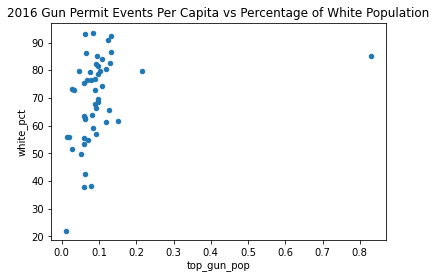

In [72]:
df.plot(x='top_gun_pop', y='white_pct', kind='scatter');
plt.title('2016 Gun Permit Events Per Capita vs Percentage of White Population');
#  There appears to be a slight increase of gun permits when the white percentage of population is higher. 
# This chart shows Kentucky as an outlier in terms of gun permits per person in 2016. 


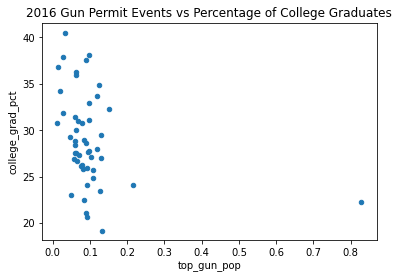

In [73]:
df.plot(x='top_gun_pop', y='college_grad_pct', kind='scatter');
plt.title('2016 Gun Permit Events vs Percentage of College Graduates');
# This plot shows states with a greater percentage of college graduates tend to have fewer gun permit events in 2016.


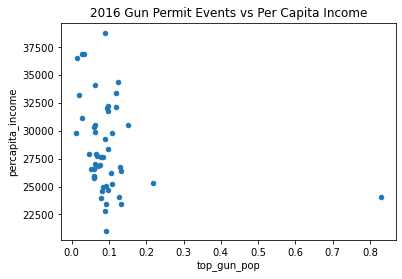

In [74]:
df.plot(x='top_gun_pop', y='percapita_income', kind='scatter');
plt.title('2016 Gun Permit Events vs Per Capita Income');
# Similar to education, many states with higher per capita income had fewer gun permit events in 2016. 

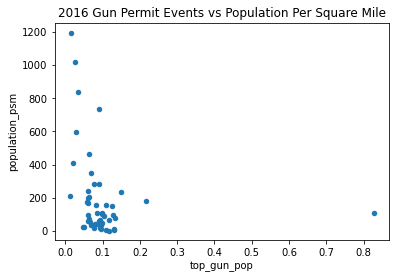

In [75]:
df.plot(x='top_gun_pop', y='population_psm', kind='scatter');
plt.title('2016 Gun Permit Events vs Population Per Square Mile');
# There appears to be more gun permit events in states with lower population per square mile overall.

<a id='conclusions'></a>
## Conclusions

> This is just the start of questions around the complicated and deep problem of guns in America. 
> While the nuances are interesting, the glaring jump in gun permits from 2010 to 2016 point to the scope 
> of the problem that that reveals itself in so many horrific headlines.
> There appears to be some correlation of fewer guns in states that have higher per capita income and college graduates,
> and more guns in states with a higher percentage of their populations that are white.
> But so many more questions remain - this data was specifically gun permits. What is the total gun ownership and how can
> this be better regulated?